# Implement a simple deep neural network (DNN) for solving the polynomial equation $𝑦 = 5𝑥^3 − 10𝑥^2 − 20𝑥 + 10$ with the following specifications:

# Required libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras import metrics
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation
from sklearn.model_selection import train_test_split

# Use three hidden-layers of sizes 32, 64, and 128 and display the generated DNN with the required number of parameters.

In [ ]:
input = Input((1,), name='Input_Layer')
x1 = Dense(32, activation='relu')(input)
x2 = Dense(64, activation='relu')(x1)
x3 = Dense(128, activation='relu')(x2)
output = Dense(1, name='Output_Layer')(x3)
model = Model(input, output, name="DNN_Model_For_Polynomial")
model.summary()

Model: "DNN_Model_For_Polynomial"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

# Generate training samples within the range of -20 to +20. Use an appropriate method for normalizing the training data in the range of -1 to +1.

In [ ]:
#  training samples within the range of -20 to +20
samples = 5000
x = np.random.uniform(-20, 20, samples)
y = 5 * (x ** 3) - 10 * (x ** 2) - 20 * x + 10

# normalizing the training data in the range of -1 to +1.
x_normalization = (2 * (x - np.min(x)) / (np.max(x) - np.min(x))) - 1
y_normalization = (2 * (y - np.min(y)) / (np.max(y) - np.min(y))) - 1



# Use 5% of the samples as test data and 5% of the samples as validation data and the rest of the data for training the DNN with an appropriate number of epochs.

In [ ]:

# 5% data for testing
x_test = x_normalization[int(samples * 0.95) : ]
y_test = y_normalization[int(samples * 0.95) : ]

# 5% data for validation
x_valid = x_normalization[int(samples * 0.90) : int(samples * 0.95)]
y_valid = y_normalization[int(samples * 0.90) : int(samples * 0.95)]

# 95% data for traing purpose
x_train = x_normalization[:int(samples * 0.9)]
y_train = y_normalization[:int(samples * 0.9)]


# trining the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mean_squared_error', metrics=[metrics.R2Score(name='accuracy')])
trained_model = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs = 10)

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6641 - loss: 0.0501 - val_accuracy: 0.9841 - val_loss: 0.0022
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9924 - loss: 0.0010 - val_accuracy: 0.9983 - val_loss: 2.3029e-04
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9988 - loss: 1.6632e-04 - val_accuracy: 0.9993 - val_loss: 9.1887e-05
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9994 - loss: 8.5470e-05 - val_accuracy: 0.9998 - val_loss: 3.0208e-05
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9998 - loss: 3.3959e-05 - val_accuracy: 0.9999 - val_loss: 1.9822e-05
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9998 - loss: 2.1095e-05 - val_accuracy: 0.9998 - val_loss: 2.2312e-05
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9999 - loss: 1.4533e-05 - val_accuracy: 0.9999 - val_loss: 9.6770e-06
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accur

# Display the training accuracy vs validation accuracy

Text(0, 0.5, 'Validation Accuracy')

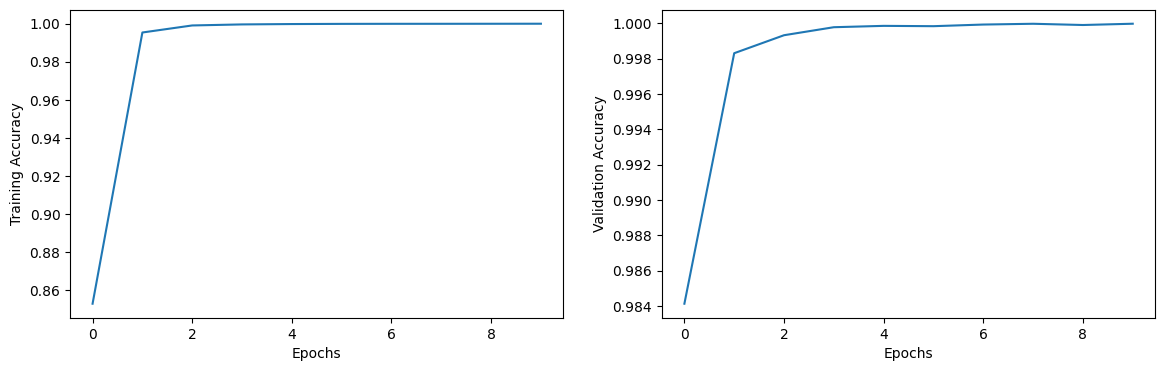

In [ ]:
# for model history
training_history = trained_model.history

# For ploting training and Validation Accuracy
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(training_history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')

plt.subplot(1,2,2)
plt.plot(training_history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')

# Display the training training error vs validation error curves.

Text(0, 0.5, 'Validation Loss')

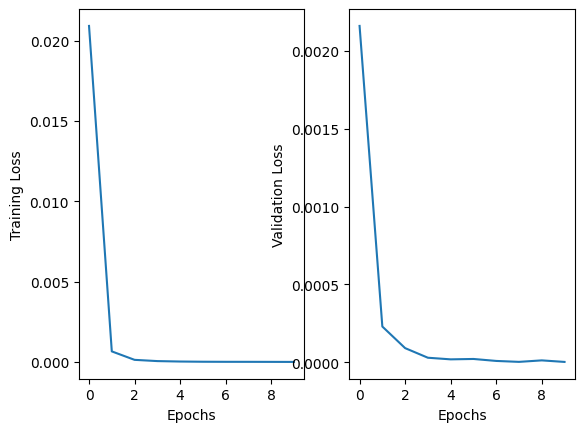

In [ ]:
# For ploting training and Validation Loss
plt.subplot(1,2,1)
plt.plot(training_history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Training Loss')

plt.subplot(1,2,2)
plt.plot(training_history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')

# prediction accuracy

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 2.6767e-06 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Text(0, 0.5, 'actual accuracy vs prediction Accuracy')

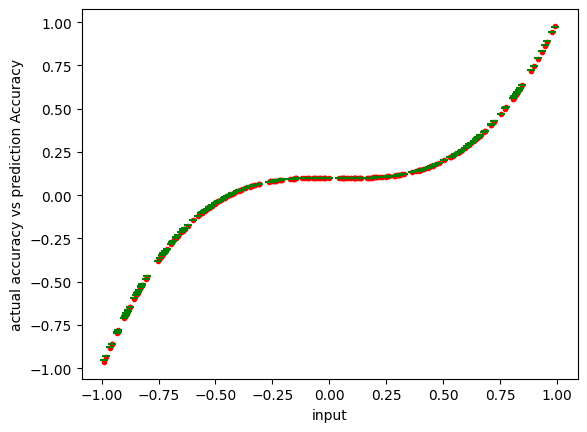

In [ ]:
model.evaluate(x_test, y_test)
y_predict = model.predict(x_test)

plt.scatter(x_test, y_test, marker='.', color='red')
plt.scatter(x_test, y_predict, marker='_', color = 'green')
plt.xlabel('input')
plt.ylabel('actual accuracy vs prediction Accuracy')
